In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

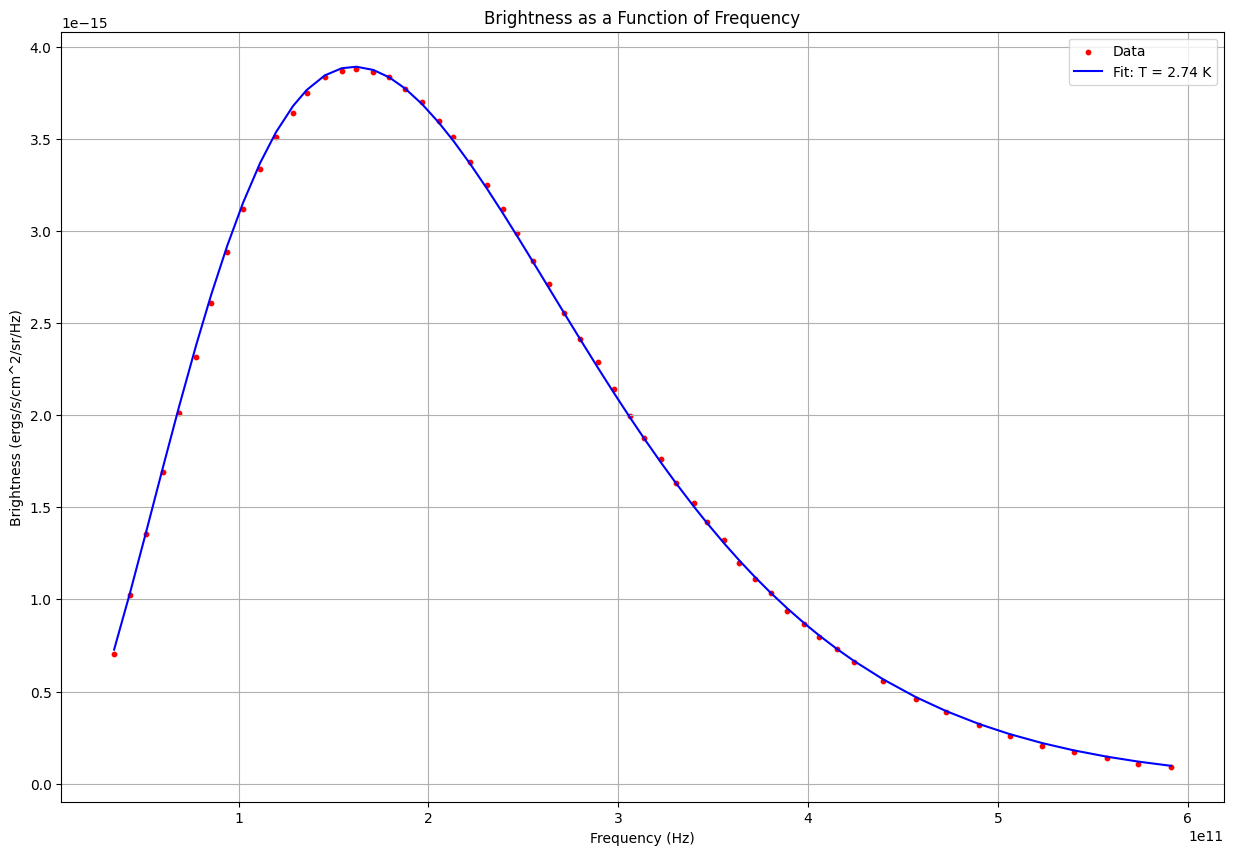

Temperature: 2.738305 K


In [2]:
file_path = 'Data/COBE_CMB_data.txt'
data = ascii.read(file_path)

# print(data)

# print(data.colnames)

# Constants
h = 6.626e-27 # Planck's constant (erg s)
c = 3.0e10    # Speed of light (cm/s)
k = 1.381e-16 # Boltzmann's constant (erg/K)  

def blackbody(frequency, T):
    """Planck's blackbody radiation formula"""
    return (2 * h * frequency**3 / c**2) * (1 / (np.exp(h * frequency / (k * T)) - 1))

# Fit the data using the blackbody function with temperature as the free parameter
popt, pcov = curve_fit(blackbody, data['frequency (Hz)'], data['brightness (ergs/s/cm^2/sr/Hz)'], p0=[100])
Temperature = popt[0]

# Plot the data and the fit
plt.figure(figsize=(15, 10))
plt.scatter(data['frequency (Hz)'], data['brightness (ergs/s/cm^2/sr/Hz)'], label='Data', color='red', s=10)
plt.plot(data['frequency (Hz)'], blackbody(data['frequency (Hz)'], Temperature), label=f'Fit: T = {Temperature:.2f} K', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness (ergs/s/cm^2/sr/Hz)')
plt.title('Brightness as a Function of Frequency')
plt.legend()
plt.grid(True)
plt.show()

print(f"Temperature: {Temperature:.6f} K")
